In [83]:
from sklearn.datasets import fetch_lfw_people
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV 
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
#use subplots to plot some example image

def example(x_num,y_num,x_label=np.array([]),y_label=np.array([]),extra_c='black',title=''):
    fig, ax = plt.subplots(x_num, y_num)
    for i, axi in enumerate(ax.flat):
        axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
        axi.set(xticks=[], yticks=[])
        if(x_label!=np.array([])):
            axi.set_xlabel(x_label[face.target[i]])
        if(y_label!=np.array([])):
            axi.set_ylabel(y_label[yfit[i]].split()[-1],
                       color='black' if yfit[i] == ytest[i] else extra_c)
    fig.suptitle(title, size=14)
    plt.show()

In [79]:
#visualize the accurate mat

def heatmap_confu(ytest,yfit):
    mat_con = confusion_matrix(ytest,yfit)
    sns.heatmap(mat_con.T, square=True, annot=True, fmt='d', 
                xticklabels=faces.target_names,
                yticklabels=faces.target_names)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


D:\Program Files (x86)\WinPython-64bit-3.5.3.0Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


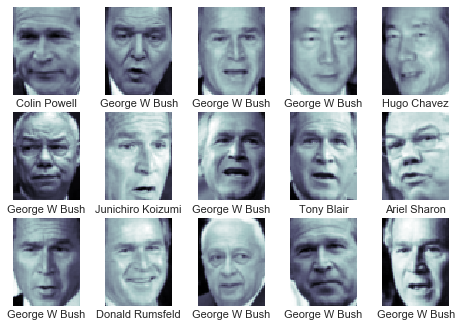

Wall time: 36.8 s
{'svc__C': 10.0, 'svc__gamma': 0.001}


D:\Program Files (x86)\WinPython-64bit-3.5.3.0Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


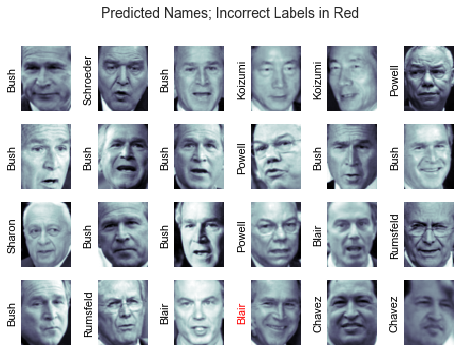

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

      avg / total       0.86      0.85      0.85       337



D:\Program Files (x86)\WinPython-64bit-3.5.3.0Qt5\python-3.5.3.amd64\lib\site-packages\seaborn\matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
D:\Program Files (x86)\WinPython-64bit-3.5.3.0Qt5\python-3.5.3.amd64\lib\site-packages\seaborn\matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


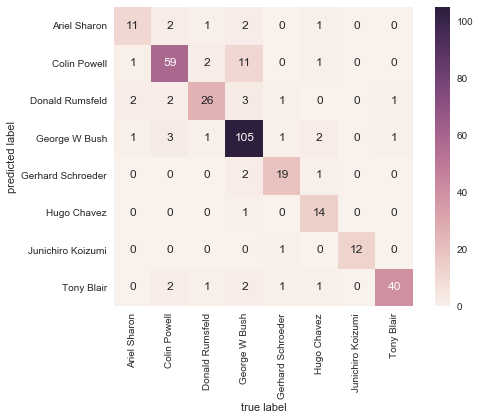

In [82]:
    ##load the data(pictures)
#select the person who has at least 60 pictures example of his faces.
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
#plot some example
example(3,5,x_label = faces.target_names)
    
    ##preprocessing before train
#select the model with mixing pca with svm
pca = PCA(svd_solver='randomized',n_components=150, whiten=True, random_state=42)
#svm(with the kernel rbf(random basic gaussion funtion)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca,svc)
#create random train and test data sets depend on the original data set
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
random_state=42)
#init the param
param_grid = {'svc__C': np.logspace(1,50,4),
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
#creat different models with different params 
grid = GridSearchCV(model, param_grid)

    ## train and predict
#start to train and calcurlate the time of each model
%time grid.fit(Xtrain,ytrain)
print(grid.best_params_)
#select the best estimator and use it to predict the test set
model = grid.best_estimator_
yfit = model.predict(Xtest)

    ## Evaluate the model ,see the accurate
#example
example(4,6,y_label = faces.target_names,
        extra_c = 'red',title='Predicted Names; Incorrect Labels in Red')
#see the f1 score
print(classification_report(ytest,yfit,target_names = faces.target_names))
#visualize the accurate mat
heatmap_confu(ytest,yfit)